In [198]:
import numpy as np
import matplotlib.pyplot as plt

In [199]:
#X = np.array([[2, 3, 9, 12],
                  #[5, 2, 6, 5]])
#y = np.array([[1, -1, 1, -1]])
def poly_powers(order):
    """
    Returns all powers for a polynomial of a given order.
    For example, if order is 2 (a, b), will return the powers for a and b to make [1, a, b, a^2, ab, b^2]
    """
    return [(k - i, i) for k in range(order + 1) for i in range(k + 1)]

def poly_transform_single(x, k):
    return np.array([((x[0] ** power[0]) * (x[1] ** power[1])) for power in poly_powers(k)])

def transform_polynomial_basis(X, k):

    if k not in range(5):
        raise ValueError("k can only be between 0 and 4")
  #  if X.shape[0] != 2:
    #    raise ValueError("X must be a 2 - dimensional array")
    output = np.zeros((len(poly_powers(k)), X.shape[1]), dtype = float)
    for i in range(output.shape[1]):
        output[:,i] = poly_transform_single(X[:,i], k)
    return output
np.set_printoptions(suppress=True)

print("original data set")
#print(transform_polynomial_basis(X, 3))


original data set


In [200]:
def transform_polynomial_basis_1d(x, order):
    """
    Transforms a single 1-dimensional data point x with a polynomial basis transformation.

    :param x: A numpy array with a single value (d=1).
    :param order: Can be 0, 1, 2 or 3.
    :return: The transformed data point x as a list.
    """
    if order==0:
        return [1]
    if order==1:
        return [1, x]
    if order==2:
        # Todo: Implement the polynomial basis for k=2:
        return [1,x,x**2]
    if order==3:
        # Todo: And for k=3:
        return [1, x, x**2, x**3]


In [201]:
def gradient_descent(f, df, x0, step_size_fn, max_iter):
    """
    Performs gradient descent on the given function f, with its gradient df.

    :param f: A function whose input is an x, a column vector, and returns a scalar.
    :param df: A function whose input is an x, a co lumn vector, and returns a column vector representing the gradient of f at x.
    :param x0: An initial value of x, x0, which is a column vector.
    :param step_size: The step size to use in each step
    :param max_iter: The number of iterations to perform

    :return x: the value at the final step
    :return fs: the list of values of f found during all the iterations (including f(x0))
    :return xs: the list of values of x found during all the iterations (including x0)
    @rtype: object
    """

    # Exercise 1 (d): Todo: Implement here.
    prev_x = x0
    xs = []
    fs = []

    for i in range(max_iter):
        prev_f = f(prev_x) #why is it using the f of previous x rather than just prev x
        prev_grad = df(prev_x)
        fs.append(prev_f)
        xs.append(prev_x)
        if i == max_iter - 1:
            return prev_x, fs, xs
        step = step_size_fn(i)
        prev_x = prev_x - step * prev_grad


    return

x values
[-1, -1.6, -1.12, -1.5039999999999998, -1.1968, -1.44256, -1.245952, -1.4032384000000002, -1.27740928, -1.3780725759999999]
y values
[1.0, 0.6400000000000011, 0.4095999999999996, 0.26214399999999954, 0.16777215999999978, 0.10737418239999998, 0.06871947673600008, 0.04398046511104028, 0.02814749767106551, 0.01801439850948183]


Text(0.5, 1.0, 'gradient descent of f(x)')

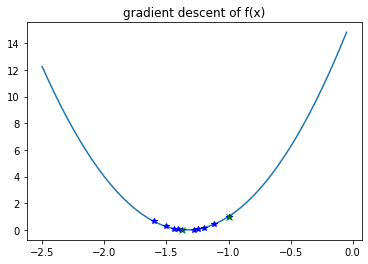

In [202]:
def f1(x):
    # Our function is f(x) = (3x+4)^2
    return float(((3 * x) + 4) ** 2)

def df1(x):
    # 1 (c): Todo: Implement the derivative here
    return float((18*x) + 24)

#create plot for gradient descent
fig_simple, ax_simple = plt.subplots()  # create an empty plot and retrieve the 'ax' handle
f1_plot_x = np.arange(-2.5, 0, 0.05)
f1_plot_y = np.array([f1(x) for x in f1_plot_x])
ax_simple.plot(f1_plot_x, f1_plot_y)
x0 = -1
last_x, fs, xs = gradient_descent(f1, df1, x0, step_size_fn=lambda i:0.1, max_iter=10)
#step=0.1
#descent_animated(f2, df2, x0, step,  15, np.linspace(-2, 2), f"f2_1_eta={step}")
i=0
for x_,f_ in zip(xs, fs):
    ax_simple.plot(x_, f_, 'b*')
print("x values")
print(xs)
print("y values")
print(fs)
ax_simple.plot(last_x, f1(last_x), 'gx')
ax_simple.plot(x0, f1(x0), "gx")
ax_simple.set_title("gradient descent of f(x)")

[[-1]
 [ 1]
 [ 2]]
[[-1  1  2]]
[[-1.  1.  2.]
 [ 1.  1.  1.]]
[[-1.  1.]
 [ 1.  1.]
 [ 2.  1.]]
[[-1.  1.]
 [ 1.  1.]
 [ 2.  1.]]
Y
[[1.5]
 [1. ]
 [2. ]]
[[0.10714286]
 [1.42857143]]


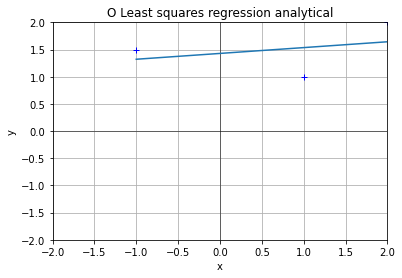

In [203]:
# set your data points to be classified where x is the point and y is the label
def data_linear_simple():
    X = np.array([[-1], [1], [2]])
    Y = np.array([[1.5], [1], [2]])
    return X, Y



X, Y = data_linear_simple()
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.grid(True, which='both')
ax.axhline(color='black', linewidth=0.5)
ax.axvline(color='black', linewidth=0.5)
ax.set_title("O Least squares regression analytical")
#.2: Todo: Compute theta* using the analytical OLS solution:
# ------------
for (x,y) in (zip(X,Y)):
    ax.plot(x,y,'b+')
# Todo: Feature transformation, add column of ones
print(X)
X_augmented =X.T#
print(X_augmented)
(d, n) = X_augmented.shape
b = np.array([np.ones(n)])
X_augmented=np.vstack((X_augmented, b))
print(X_augmented)

X_augmented=X_augmented.T
print(X_augmented)

#todo: for the transormation of polynomial basis 1d.
#X_augmented=np.array([transform_polynomial_basis_1d(x[0],  2) for x in X])
print(X_augmented)
print("Y")
print(Y)
np.set_printoptions(suppress=True)
theta_star = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ Y
ax.plot(X, [np.dot(x, theta_star) for x in X_augmented])
print(theta_star)

plt.show()

# Exercise 2

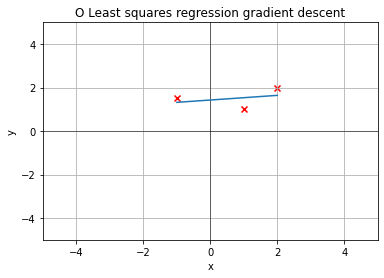

In [204]:
# Exercise 2.3 - Solution using gradient descent:
# ------------

# Todo: Implement the loss function:
def squared_loss(x, y, theta):
    return (x@theta - y)**2

# Todo: Implement the OLS objective function (using the loss):
def ols_objective(X, Y, theta):
    return np.mean(squared_loss(X, Y, theta))

# Todo: Implement the partial derivative of the squared loss w.r.t. theta
def d_squared_loss_theta(x, y, theta):
    return (2 / x.shape[0]) * ((x.T @ x @ theta) - (x.T @ y))
        #(2 / x.shape[1]) @ x.T @ (x @ theta - y)


# Todo: Implement the partial derivative of the OLS objective w.r.t. theta (using the partial derivative of the squared loss):
def d_ols_objective_theta(x, y, theta):
    return d_squared_loss_theta(x, y, theta)

# Finally, the gradient of our OLS objective is simply d_ols_objective_theta (as theta is our only parameter):
def ols_objective_grad(X, Y, theta):
    return d_ols_objective_theta(X, Y, theta)

# And we define the function that we want to minimise as the OLS objective over our dataset (X_augmented, Y):
def f_ols(theta):
    return ols_objective(X_augmented, Y, theta)

# And its gradient:
def df_ols(theta):
    return ols_objective_grad(X_augmented, Y, theta)

# Todo: Set an initial value for theta_init:
theta_init = np.zeros((X_augmented.shape[1], 1))

# We define a step size function - let's return a constant step size, independent of the iteration i:
def step_size_fn(i):
    return 0.05  # Todo: Experiment with various step sizes
# Now we're ready to run gradient descent to minimise f_ols:
last_x, fs, xs = gradient_descent(f_ols, df_ols, theta_init, step_size_fn=step_size_fn, max_iter=500)
step=0.1

fig1, ax1 = plt.subplots()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.grid(True, which='both')
ax1.axhline(color='black', linewidth=0.5)
ax1.axvline(color='black', linewidth=0.5)
ax1.set_title("O Least squares regression gradient descent")
# Todo: Plot the found hypothesis into the figure with the data.
ax1.scatter(X, Y, color='red', marker='x')
ax1.plot(X, [np.dot(x, last_x) for x in X_augmented])
# Todo: Also plot individual steps of gradient descent, to see how the optimisation behaves.
# Exercise 2.3 iii):
# Todo: Plot the loss over the iterations
# ... ax_loss.plot(...) ...
#ax1.plot(np.linspace(1, len(fs), len(fs)), fs, 'b-')
#ax1.plot(range(len(xs)), fs)
#ax1.plot(X, [np.dot(x, theta_star) for x in X_augmented])


Ridge Regression

[[-1.  1.]
 [ 1.  1.]
 [ 2.  1.]]
[[1.5]
 [1. ]
 [2. ]]
theta, \ theta0
[[0.17892157]
 [0.31862745]]


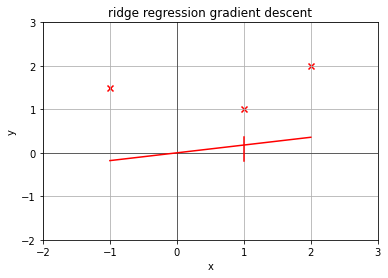

In [205]:


# Todo: Implement the OLS objective function (using the loss):
def ols_objective_with_reg(X, Y, theta):
    return np.mean(squared_loss(X, Y, theta)) + (2 * theta**2)


# Todo: Implement the partial derivative of the squared loss w.r.t. theta
def d_squared_loss_theta_with_reg(x, y, theta):
    return ((2 / x.shape[0]) * ((x.T @ x @ theta) - (x.T @ y))) + (2 * lambd * theta)
        #(2 / x.shape[1]) @ x.T @ (x @ theta - y)


# Todo: Implement the partial derivative of the OLS objective w.r.t. theta (using the partial derivative of the squared loss):
def d_ols_objective_theta_with_reg(x, y, theta):
    return d_squared_loss_theta_with_reg(x, y, theta)

# Finally, the gradient of our OLS objective is simply d_ols_objective_theta (as theta is our only parameter):
def ols_objective_grad_with_reg(X, Y, theta):
    return d_ols_objective_theta_with_reg(X, Y, theta)

# And we define the function that we want to minimise as the OLS objective over our dataset (X_augmented, Y):
def f_olsR(theta):
    return ols_objective_with_reg(X_augmented, Y, theta)

# And its gradient:
def df_olsR(theta):
    return ols_objective_grad_with_reg(X_augmented, Y, theta)

# Todo: Set an initial value for theta_init:
theta_init = np.zeros((X_augmented.shape[1], 1))

# We define a step size function - let's return a constant step size, independent of the iteration i:
def step_size_fn(i):
    return 0.01  # Todo: Experiment with various step sizes
# Now we're ready to run gradient descent to minimise f_ols:
lambd = 10
#last_x, fs, xs = gradient_descent(f_olsR, df_olsR, theta_init, step_size_fn=step_size_fn, max_iter=500)
step=0.1

fig2, ax2 = plt.subplots()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(-2, 3)
ax2.set_ylim(-2, 3)
ax2.grid(True, which='both')
ax2.axhline(color='black', linewidth=0.5)
ax2.axvline(color='black', linewidth=0.5)
ax2.set_title("ridge regression gradient descent")
# Todo: Plot the found hypothesis into the figure with the data.
print(X_augmented)
print(Y)
ax2.scatter(X, Y, color='red', marker='x')
#ax2.plot(X, [np.dot(x, last_x) for x in X_augmented])
# Todo: Also plot individual steps of gradient descent, to see how the optimisation behaves.
# Exercise 2.3 iii):
# Todo: Plot the loss over the iterations
# ... ax_loss.plot(...) ...
#ax2.plot(range(len(xs)), fs)
X=X_augmented
(d,n) = X.shape
theta_star2 = np.linalg.inv((X.T@X)+(lambd*np.identity(n)))@X.T@Y
print("theta, \\ theta0")
print(theta_star2)
theta_star2[1] =[0]
ax2.plot(X, [np.dot(x, theta_star2) for x in X], 'r')